In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, median_absolute_error

Датасет взят с https://www.kaggle.com/datasets/devansodariya/student-performance-data

In [2]:
!gdown 13rZskBQ1n25zDBhwxxLy-TKWvGQuBLQZ

Downloading...
From: https://drive.google.com/uc?id=13rZskBQ1n25zDBhwxxLy-TKWvGQuBLQZ
To: /content/student_data.csv
100% 42.0k/42.0k [00:00<00:00, 39.2MB/s]


In [3]:
df = pd.read_csv('student_data.csv', sep=',')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
df['G1'] = df['G1'].astype(int)
df['G2'] = df['G2'].astype(int)
df['G3'] = df['G3'].astype(int)

<ipython-input-6-89693c677d29>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), fmt='.2f', square=True, annot=True)


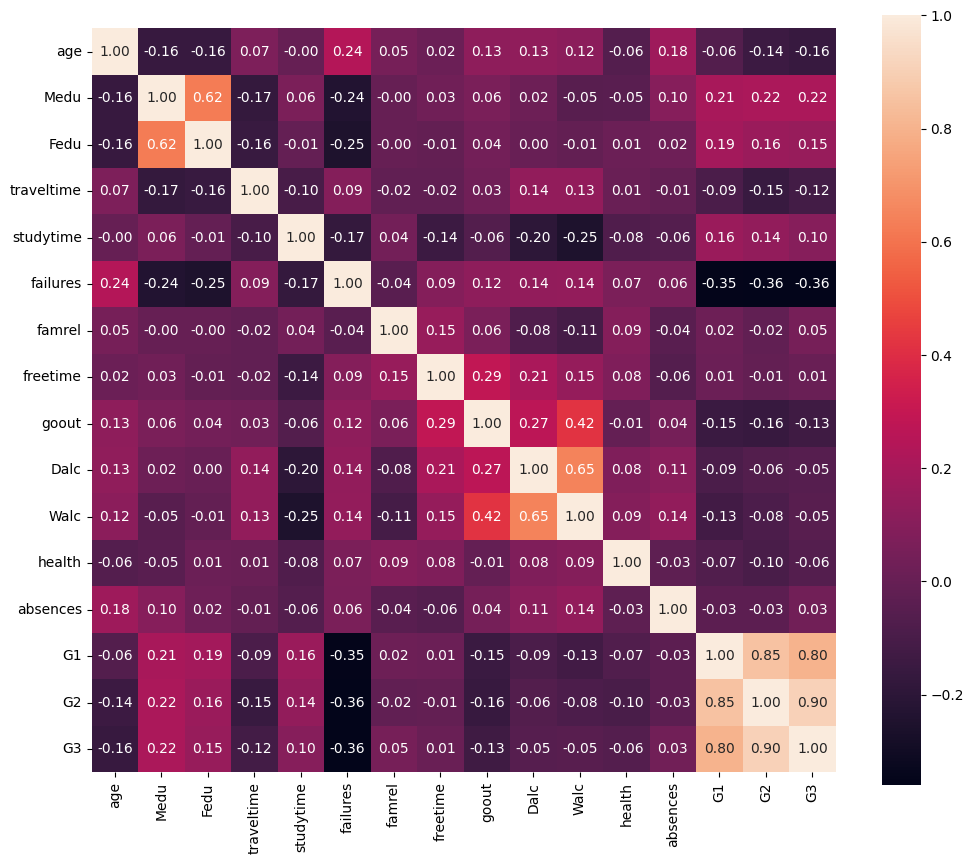

In [6]:
import seaborn as sns

plt.subplots(figsize=(12, 10))
sns.heatmap(df.corr(), fmt='.2f', square=True, annot=True)
plt.show()

### Подготовка данных

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['G1', 'G2', 'G3']), df['G3'], test_size=0.2, random_state=42)

In [8]:
categorical_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(include=object).columns.values
categorical_features

array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object)

In [9]:
numeric_features = df.drop(columns=['G1', 'G2', 'G3']).select_dtypes(exclude=object).columns.values
numeric_features

array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)

In [10]:
from sklearn.pipeline import make_pipeline # конвейн подготовки данных?
from sklearn.pipeline import Pipeline # конвер алгоритмов?
from sklearn.impute  import SimpleImputer # помогает заполнять пропущенные значения, какими-то статистиками?
from sklearn.preprocessing import OneHotEncoder, StandardScaler 
from sklearn.compose import ColumnTransformer 
from sklearn.ensemble import RandomForestRegressor 
# конвейр для числовых данных
numeric_transformer = make_pipeline(SimpleImputer(strategy='median'),
                                    StandardScaler())

# конвейр для категориальных данных 
preprocessor = ColumnTransformer(
    [
        ('num', numeric_transformer, numeric_features),
        (
            'cat',
             OneHotEncoder(handle_unknown='ignore', sparse=False),
             categorical_features 
        )
    ],
    verbose_feature_names_out=False,
)
# подготовка и обучение алгоритма
alg = Pipeline(steps=[
    ('enc', preprocessor),
    ('alg', RandomForestRegressor())
])

alg.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('enc',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  array(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health',
       'absences'], dtype=object)),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  array(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'], dtype=object))],
                                   verbose_feature_names_out=False)),
                ('alg', RandomForestRegressor())])

In [11]:
preds = alg.predict(X_test)

r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.2939130848935706, 2.4700000000000006)

In [13]:
# Отклонение целевой переменной
y_test.mean(), y_test.std()

(10.772151898734178, 4.55718471092093)

## Grid search

In [17]:
parameters = {
    # название этпапа подготовки__гиперпараметр: [сетка (список) параметров]
    'alg__n_estimators': [100, 300, 500, 1000],
    'alg__min_samples_leaf': [1, 2, 4, 6],
    'alg__max_features': ['auto', 'sqrt', 'log2']
}

In [18]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(alg,
                  parameters,
                  cv=5,
                  verbose=2,
                  n_jobs=2)
gs.fit(X_train, y_train)
gs.best_params_

Fitting 5 folds for each of 48 candidates, totalling 240 fits


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'alg__max_features': 'auto',
 'alg__min_samples_leaf': 4,
 'alg__n_estimators': 300}

In [19]:
gs.cv_results_

{'mean_fit_time': array([0.46437235, 1.28237104, 2.74485874, 4.52731762, 0.6640789 ,
        1.14247231, 3.78114944, 4.04751067, 0.39373322, 2.13181152,
        2.2787291 , 4.26050534, 0.4685565 , 1.37522283, 3.01113157,
        5.85260973, 0.40819163, 1.7384409 , 2.21274614, 4.3739387 ,
        0.61252837, 1.04492788, 1.90290008, 2.40233312, 0.23976979,
        0.7322969 , 2.09991136, 2.3980135 , 0.24394746, 0.66138902,
        1.65620685, 2.14639211, 0.25190234, 0.7259798 , 1.69998546,
        2.42340436, 0.24639177, 0.68500667, 1.6391706 , 2.26282897,
        0.23053374, 0.66903548, 1.39304461, 2.40171771, 0.23133678,
        0.65890231, 1.10130243, 2.53359094]),
 'std_fit_time': array([0.01456617, 0.01929609, 0.6255244 , 0.6630899 , 0.17185446,
        0.03467718, 0.82188099, 0.62688332, 0.07413099, 0.59081868,
        0.55099468, 0.60843253, 0.03342586, 0.30201814, 0.39450709,
        1.17683227, 0.09997835, 0.38151636, 0.17215765, 0.61061539,
        0.07627189, 0.11654321, 0.122

In [21]:
preds = gs.best_estimator_.predict(X_test)

r2_score(y_test, preds), median_absolute_error(y_test, preds)

(0.28912271376368404, 2.4829643068919367)